## Extraction des valeures immo 2024
Script d'extraction des données d'un dataset immobilier français pour l'année 2024.

In [1]:
import pandas as pd

data = open('data/ValeursFoncieres-2024.txt', 'r', encoding='utf-8')
df = pd.read_csv(data, sep='|')
df.info()
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

/var/folders/4p/b2z8znkj2_q5zj_03_ts9tnr0000gn/T/ipykernel_1611/2872320811.py:4: DtypeWarning: Columns (18,23,24,26,28,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489149 entries, 0 to 3489148
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Identifiant de document     float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

In [4]:
# Cleaning columns names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/','_')
print(df.columns)

Index(['identifiant_de_document', 'reference_document', '1_articles_cgi',
       '2_articles_cgi', '3_articles_cgi', '4_articles_cgi', '5_articles_cgi',
       'no_disposition', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'no_voie', 'b_t_q', 'type_de_voie', 'code_voie', 'voie', 'code_postal',
       'commune', 'code_departement', 'code_commune', 'prefixe_de_section',
       'section', 'no_plan', 'no_volume', '1er_lot',
       'surface_carrez_du_1er_lot', '2eme_lot', 'surface_carrez_du_2eme_lot',
       '3eme_lot', 'surface_carrez_du_3eme_lot', '4eme_lot',
       'surface_carrez_du_4eme_lot', '5eme_lot', 'surface_carrez_du_5eme_lot',
       'nombre_de_lots', 'code_type_local', 'type_local', 'identifiant_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'nature_culture',
       'nature_culture_speciale', 'surface_terrain'],
      dtype='object')


In [6]:
df['valeur_fonciere'] = df['valeur_fonciere'].fillna(0)

In [7]:
df.isna().sum()

identifiant_de_document       3225679
reference_document            3225679
1_articles_cgi                3225679
2_articles_cgi                3225679
3_articles_cgi                3225679
4_articles_cgi                3225679
5_articles_cgi                3225679
no_disposition                      0
date_mutation                       0
nature_mutation                     0
valeur_fonciere                     0
no_voie                       1318788
b_t_q                         3090699
type_de_voie                  1366075
code_voie                       22351
voie                            22382
code_postal                     22671
commune                             0
code_departement                    0
code_commune                        0
prefixe_de_section            3066884
section                            92
no_plan                             0
no_volume                     3217633
1er_lot                       2208266
surface_carrez_du_1er_lot     2933363
2eme_lot    

In [8]:
colsToRemove = [
    'identifiant_de_document', 
    'reference_document',
]

df = df.drop(columns=colsToRemove)

df = df.drop(list(df.filter(regex='articles_cgi')), axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3225679 entries, 0 to 3225678
Data columns (total 36 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   no_disposition              int64  
 1   date_mutation               object 
 2   nature_mutation             object 
 3   valeur_fonciere             float64
 4   no_voie                     float64
 5   b_t_q                       object 
 6   type_de_voie                object 
 7   code_voie                   object 
 8   voie                        object 
 9   code_postal                 float64
 10  commune                     object 
 11  code_departement            object 
 12  code_commune                int64  
 13  prefixe_de_section          float64
 14  section                     object 
 15  no_plan                     int64  
 16  no_volume                   object 
 17  1er_lot                     object 
 18  surface_carrez_du_1er_lot   float64
 19  2eme_lot             

In [11]:
df['valeur_fonciere'] = (
    df['valeur_fonciere']
    .astype(str)
    .str.replace(',', '.', regex=False)
)

df['valeur_fonciere'] = pd.to_numeric(df['valeur_fonciere'], errors='coerce')

df['valeur_fonciere'] = df['valeur_fonciere'].fillna(0)

In [ ]:
def parseFloat(df, column):
    df[column] = (
        df[column]
        .astype(str)
        .str.replace(',', '.', regex=False)
    )

    df[column] = pd.to_numeric(df[column], errors='coerce')

    df[column] = df[column].fillna(0)

    return df
    

In [14]:
parseFloat('surface_reelle_bati')
parseFloat('surface_terrain')
parseFloat('surface_carrez_du_1er_lot')
parseFloat('surface_carrez_du_2eme_lot')

In [18]:
surface = df.filter(regex='surface')
print(surface.columns)

for surface in surface.columns:
    parseFloat(surface)

Index(['surface_carrez_du_1er_lot', 'surface_carrez_du_2eme_lot',
       'surface_carrez_du_3eme_lot', 'surface_carrez_du_4eme_lot',
       'surface_carrez_du_5eme_lot', 'surface_reelle_bati', 'surface_terrain'],
      dtype='object')


In [23]:
df['surface_carrez_du_1er_lot'].describe().apply(lambda x: format(x, '.0f'))

count    3225679
mean           5
std           35
min            0
25%            0
50%            0
75%            0
max         8432
Name: surface_carrez_du_1er_lot, dtype: object

In [27]:
df.sort_values(by='valeur_fonciere', ascending=False).head(25)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b_t_q,type_de_voie,code_voie,voie,code_postal,...,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,identifiant_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
3173217,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,450.0,0.0,S,NaN,871.0
3173226,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,595.0,0.0,S,NaN,871.0
3173220,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,597.0,0.0,S,NaN,871.0
3173219,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,2.0,Appartement,NaN,16.0,2.0,S,NaN,871.0
3173218,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,540.0,0.0,S,NaN,871.0
3173216,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,594.0,0.0,S,NaN,871.0
3173215,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,655.0,0.0,S,NaN,871.0
3173222,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,0.0,0.0,S,NaN,871.0
3173223,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,763.0,0.0,S,NaN,871.0
3173224,1,27/06/2024,Vente,255000000.0,42.0,NaN,AV,6450,MONTAIGNE,75008.0,...,0.0,0,4.0,Local industriel. commercial ou assimilé,NaN,816.0,0.0,S,NaN,871.0


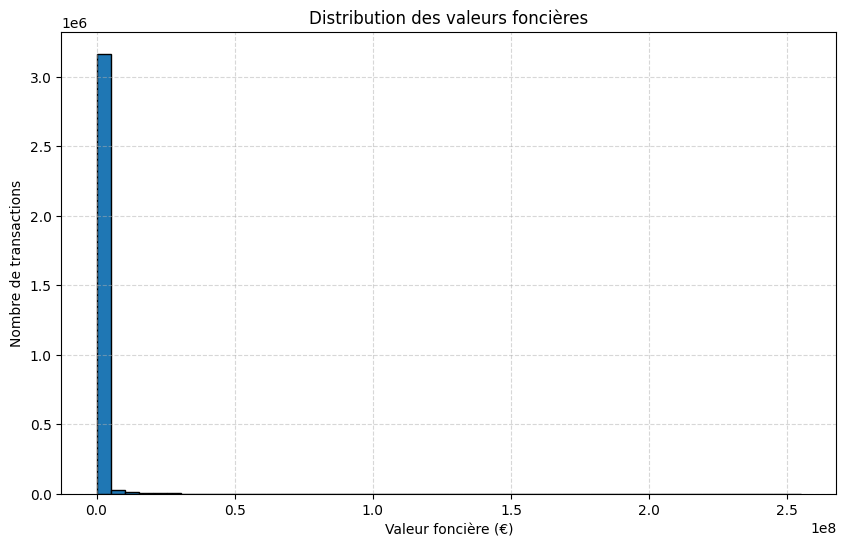

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['valeur_fonciere'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("Distribution des valeurs foncières")
plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
top_communes = (
    df.groupby('code_postal')['valeur_fonciere']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_communes.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 des communes par valeur foncière moyenne")
plt.xlabel("Code Postal")
plt.ylabel("Valeur foncière moyenne (€)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
class Fruit:
    def __init__(self, product, price):
        self.product = product
        self.price = price
    
    def toString(self):
        print("La",self.product,"coute", self.price,"€")

inventory = [
    Fruit("Banane", 6.00),
    {"product": "Apple", "price": 5.70},
    {"product": "Orange", "price": 4.50},
    {"product": "Mango", "price": 8.60},
    {"product": "Banana", "price": 6.00},
    {"product": "Pepper", "price": 4.20},
    {"product": "Carrot", "price": 3.57}
]


banana = Fruit("Banane", 6.00)

print(inventory[0].toString())

In [ ]:
def cleanNumber(column):
    df[column] = (
        df[column]
        .astype(str)
        .str.replace(',', '.', regex=False)
    )

    df[column] = pd.to_numeric(df[column], errors='coerce')

    df[column] = df[column].fillna(0)

In [ ]:
cleanNumber('surface_carrez_du_1er_lot')

In [ ]:
df['surface_carrez_du_1er_lot'].describe().apply(lambda x: format(x, '.0f'))

In [ ]:
df.sort_values(by='valeur_fonciere', ascending=False).head(250)

In [36]:
df_clean = df.copy()

df_clean = df_clean.drop(df_clean[df_clean['type_local'] == 'Local industriel. commercial ou assimilé'].index).drop(df_clean[df_clean['type_local'].isna()].index)

In [50]:
df_clean.reset_index(drop=True, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510183 entries, 0 to 1510182
Data columns (total 36 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   no_disposition              1510183 non-null  int64  
 1   date_mutation               1510183 non-null  object 
 2   nature_mutation             1510183 non-null  object 
 3   valeur_fonciere             1510183 non-null  float64
 4   no_voie                     1496847 non-null  float64
 5   b_t_q                       102318 non-null   object 
 6   type_de_voie                1370967 non-null  object 
 7   code_voie                   1510183 non-null  object 
 8   voie                        1510178 non-null  object 
 9   code_postal                 1510080 non-null  float64
 10  commune                     1510183 non-null  object 
 11  code_departement            1510183 non-null  object 
 12  code_commune                1510183 non-null  int64  
 1

In [49]:
df_clean.sort_values(by='valeur_fonciere', ascending=True).head(25)

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b_t_q,type_de_voie,code_voie,voie,code_postal,...,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,identifiant_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
1295783,1,02/08/2024,Echange,30000.0,602.0,NaN,CHE,5047,DE MATRAS,82000.0,...,0.0,0,3.0,Dépendance,NaN,0.0,0.0,T,NaN,1315.0
1468331,1,31/10/2024,Vente,30000.0,51.0,NaN,RUE,3120,EDOUARD NORTIER,92200.0,...,0.0,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0
57369,1,17/05/2024,Vente,30000.0,1.0,NaN,AV,0890,DE PROFONDEVILLE,6190.0,...,0.0,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0
57364,1,29/04/2024,Vente,30000.0,2.0,NaN,TRA,3965,DES MARAICHERS,6200.0,...,0.0,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0
1106244,1,15/03/2024,Vente,30000.0,156.0,NaN,AV,0765,BOLLEE,72000.0,...,0.0,2,2.0,Appartement,NaN,32.0,1.0,NaN,NaN,0.0
57361,1,22/04/2024,Vente,30000.0,66.0,NaN,AV,3230,HENRY DUNANT,6100.0,...,0.0,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0
1561179,1,30/07/2024,Vente,30000.0,7.0,NaN,AV,1235,SIMONE DE BEAUVOIR,95240.0,...,0.0,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0
1033315,1,04/11/2024,Vente,30000.0,749.0,A,NaN,B139,LES VINYES DE ST MARTI,66480.0,...,0.0,0,1.0,Maison,NaN,40.0,3.0,VE,POMME,1594.0
1106243,1,15/03/2024,Vente,30000.0,156.0,NaN,AV,0765,BOLLEE,72000.0,...,0.0,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0
1106242,1,15/03/2024,Vente,30000.0,156.0,NaN,AV,0765,BOLLEE,72000.0,...,0.0,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,0.0


zsh:1: command not found: python


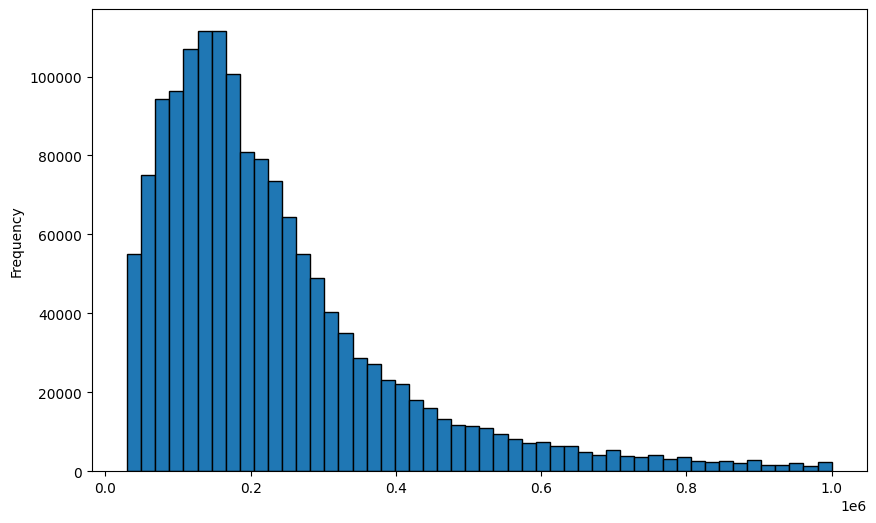

In [51]:
!python -m pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_clean['valeur_fonciere'].plot(kind='hist', bins=50, edgecolor='black')
# plt.title("Distribution des valeurs foncières")
# plt.xlabel("Valeur foncière (€)")
# plt.ylabel("Nombre de transactions")
# plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [48]:
# df_clean = df_clean.drop(df_clean.nlargest(100000, 'valeur_fonciere').index)

df_clean = df_clean.drop(df_clean[df_clean['valeur_fonciere'] < 30000.0].index)
df_clean = df_clean.drop(df_clean[df_clean['valeur_fonciere'] > 1000000.0].index)


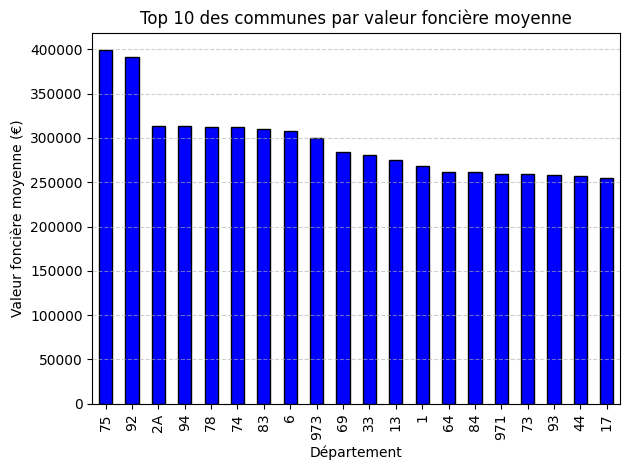

In [52]:
top_communes = (
    df_clean.groupby('code_departement')['valeur_fonciere']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

top_communes.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 des communes par valeur foncière moyenne")
plt.xlabel("Département")
plt.ylabel("Valeur foncière moyenne (€)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [84]:
df_clean.to_csv('../data/valeurs_foncieres_cleaned.csv', index=False, chunksize=10)

chunk_size = 250000
num_chunks = len(df_clean) // chunk_size + 1

for i in range(num_chunks):
    start_row = i * chunk_size
    end_row = min((i + 1) * chunk_size, len(df_clean))
    chunk = df_clean.iloc[start_row:end_row]
    chunk.to_csv(f'../data/valeurs_foncieres_cleaned_part_{i+1}.csv', index=False)

In [55]:
df_clean = df_clean.drop(columns=['b_t_q','identifiant_local','nature_culture_speciale'])

In [ ]:
top_communes

In [ ]:
df_clean.head()

## https://github.com/julienf31/yboost

In [80]:
## surface_reelle_bati surface_terrain

df_test = df_clean.copy()

df_test = df_test.drop(df_test[(df_test['surface_reelle_bati'] == 0.0) & (df_test['surface_terrain'] == 0.0)].index)


In [78]:
print(len(df_clean))
print(len(df_test))

1510183
1110848


In [66]:
df_test[(df_test['surface_reelle_bati'] == 0.0) & (df_test['surface_terrain'] == 0.0)]

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,type_de_voie,code_voie,voie,code_postal,commune,...,surface_carrez_du_4eme_lot,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,surface_terrain
1,1,03/01/2024,Vente,329500.0,9001.0,PL,0500,DU JURA,1170.0,GEX,...,0.0,NaN,0.0,1,3.0,Dépendance,0.0,0.0,NaN,0.0
2,1,03/01/2024,Vente,329500.0,29.0,PL,0500,DU JURA,1170.0,GEX,...,0.0,NaN,0.0,2,3.0,Dépendance,0.0,0.0,NaN,0.0
13,1,04/01/2024,Vente,105000.0,269.0,RUE,0240,DE LA MAIRIE,1960.0,SAINT-ANDRE-SUR-VIEUX-JONC,...,0.0,NaN,0.0,2,3.0,Dépendance,0.0,0.0,NaN,0.0
16,1,05/01/2024,Vente,355000.0,53.0,ALL,0550,DU PARC DU CHENE,1220.0,DIVONNE-LES-BAINS,...,0.0,NaN,0.0,1,3.0,Dépendance,0.0,0.0,NaN,0.0
18,1,05/01/2024,Vente,355000.0,53.0,ALL,0550,DU PARC DU CHENE,1220.0,DIVONNE-LES-BAINS,...,0.0,NaN,0.0,2,3.0,Dépendance,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510170,1,18/12/2024,Vente,280000.0,260.0,AV,2584,DAUMESNIL,75012.0,PARIS 12,...,0.0,NaN,0.0,2,3.0,Dépendance,0.0,0.0,NaN,0.0
1510171,1,18/12/2024,Vente,280000.0,260.0,AV,2584,DAUMESNIL,75012.0,PARIS 12,...,0.0,NaN,0.0,2,3.0,Dépendance,0.0,0.0,NaN,0.0
1510174,1,30/12/2024,Vente,258000.0,3.0,RUE,5884,DE MADAGASCAR,75012.0,PARIS 12,...,0.0,NaN,0.0,1,3.0,Dépendance,0.0,0.0,NaN,0.0
1510176,1,26/02/2024,Vente,332000.0,23.0,RUE,1714,DU CHAMP DE L ALOUETTE,75013.0,PARIS 13,...,0.0,NaN,0.0,2,3.0,Dépendance,0.0,0.0,NaN,0.0


In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510183 entries, 0 to 1510182
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   no_disposition              1510183 non-null  int64  
 1   date_mutation               1510183 non-null  object 
 2   nature_mutation             1510183 non-null  object 
 3   valeur_fonciere             1510183 non-null  float64
 4   no_voie                     1496847 non-null  float64
 5   type_de_voie                1370967 non-null  object 
 6   code_voie                   1510183 non-null  object 
 7   voie                        1510178 non-null  object 
 8   code_postal                 1510080 non-null  float64
 9   commune                     1510183 non-null  object 
 10  code_departement            1510183 non-null  object 
 11  code_commune                1510183 non-null  int64  
 12  prefixe_de_section          68879 non-null    float64
 1

In [ ]:
df_clean = df_clean.drop(df_clean.columns[16:25], axis=1)